<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/12_3_LSTM_%EC%99%84%EC%A0%84%EA%B8%B4%EB%AC%B8%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-12-4-rnn_long_char.py

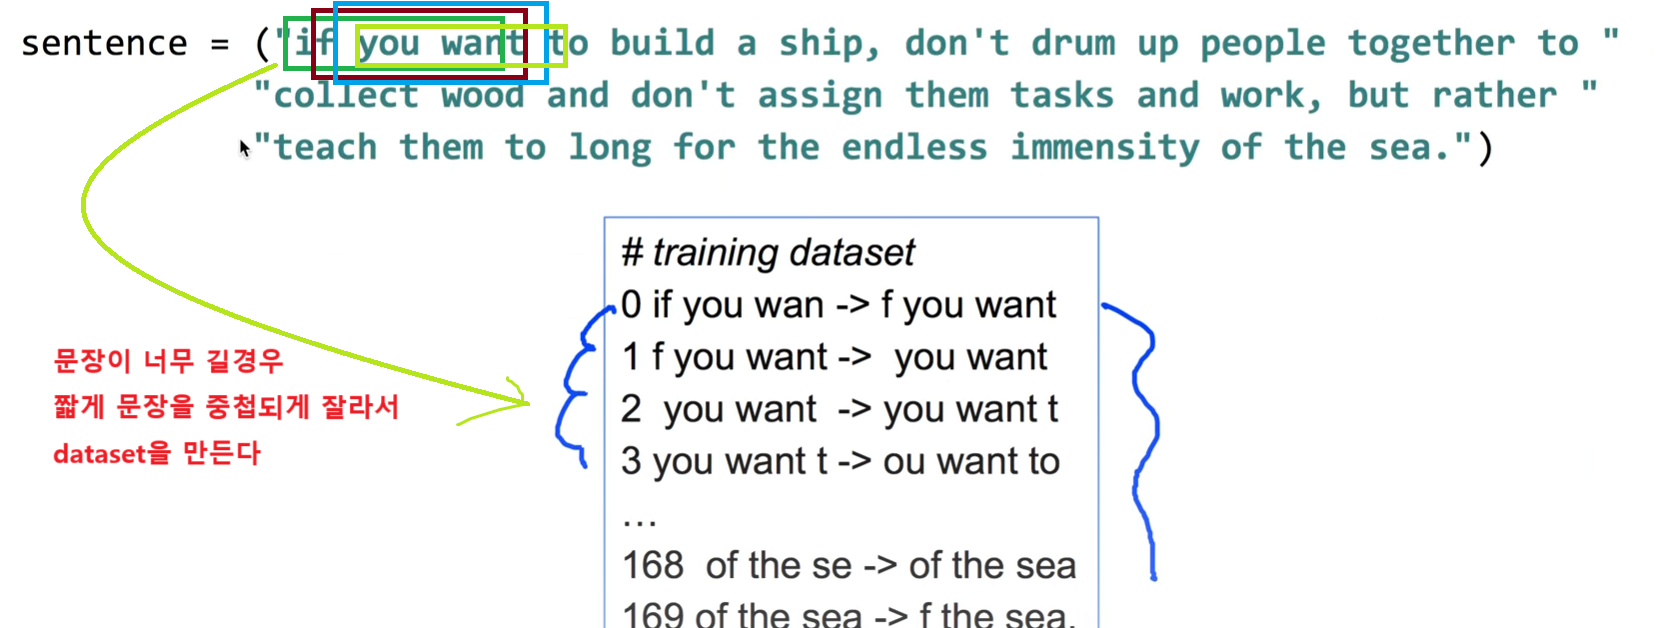![image.png]()

In [1]:
import tensorflow as tf
import numpy as np

In [5]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}
char_dic

{'.': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 't': 4,
 'e': 5,
 'h': 6,
 "'": 7,
 'i': 8,
 's': 9,
 'u': 10,
 'o': 11,
 'y': 12,
 'g': 13,
 ' ': 14,
 ',': 15,
 'r': 16,
 'k': 17,
 'p': 18,
 'l': 19,
 'n': 20,
 'f': 21,
 'm': 22,
 'w': 23,
 'a': 24}

In [6]:
data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

# One-hot encoding
X_one_hot = tf.one_hot(dataX, num_classes)
Y_one_hot = tf.one_hot(dataY, num_classes)

print(X_one_hot.shape)  # check out the shape (170, 10, 25)
print(Y_one_hot.shape)  # check out the shape

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [9]:
tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.
             LSTM(units=num_classes, input_shape=(sequence_length, X_one_hot.shape[2]), return_sequences=True))
tf.model.add(tf.keras.layers.LSTM(units=num_classes, return_sequences=True))
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
tf.model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 10, 25)              │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 10, 25)              │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 10, 25)              │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,850 (42.38 KB)

 Trainable params: 10,850 (42.38 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])
tf.model.fit(X_one_hot, Y_one_hot, epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1146 - loss: 3.0768
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1887 - loss: 2.8467 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1936 - loss: 2.6830 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2761 - loss: 2.4211 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4515 - loss: 1.9318  
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5703 - loss: 1.4603  
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6514 - loss: 1.1456 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7471 - loss: 0.8484 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7996 - loss: 0.6805 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8387 - loss: 0.5392 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8535 - loss: 0.4631 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8659 - lo

In [4]:
results = tf.model.predict(X_one_hot)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j == 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.